In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import svm
from datetime import datetime
from sklearn.metrics import roc_auc_score
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

In [184]:
df

,id,result,enter,leave,var0,var1,var2,var3,timeS
0,0,0,2018-11-02 20:43:36,2018-11-02 20:44:11,22480,1277,75137,"[3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",35
1,0,0,2018-11-02 20:44:15,2018-11-02 20:45:08,22480,1277,74096,"[1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",53
2,0,0,2018-11-06 06:58:06,2018-11-06 06:58:10,25795,461,2618,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",4
3,0,0,2018-11-06 08:38:29,2018-11-06 08:38:36,20078,3715,32151,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",7
4,0,0,2018-11-06 08:38:39,2018-11-06 08:39:05,20078,3715,33750,"[0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0...",26
5,0,0,2018-11-12 18:00:06,2018-11-12 18:00:36,28600,2644,32150,"[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",30
6,0,0,2018-11-12 18:00:06,2018-11-12 18:00:37,28600,2644,32150,"[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",31
7,0,0,2018-11-12 21:50:59,2018-11-12 21:51:04,29203,5170,32150,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",5
8,0,0,2018-11-12 21:51:06,2018-11-12 21:51:23,29203,5170,33750,"[0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0...",17
9,0,0,2018-11-12 21:51:24,2018-11-12 21:51:58,29203,5170,34552,"[1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0...",34


Посчитаем время в секундах для каждого экземпляра, и добавим это значение к исходному набору данных

In [247]:
sec=[]
for number in  range(df.shape[0]):
    x=datetime.strptime( df.leave[number], "%Y-%m-%d %H:%M:%S" )-datetime.strptime( df.enter[number], "%Y-%m-%d %H:%M:%S" )
    #print (x.seconds)
    sec.append (x.seconds)


In [78]:
df['timeS'] = sec

В переменной var3 находится вектор дополнительный признаков в формате строки. Распарсим эти значение в отдельный дата фрейм, и объединим его с исходным

In [221]:
new=[]
for number in  range(df.shape[0]):
    x=np.fromstring(df.var3[number][1:-1], dtype=int, sep=',')
    new.append (x)

In [223]:
df2=pd.DataFrame(new)

In [226]:
df2.columns=['d1', 'd2', 'd3','d4', 'd5','d6', 'd7', 'd8','d9', 'd10','d11', 'd12', 'd13','d14', 'd15','d16', 'd17', 'd18','d19', 'd20','d21', 'd22', 'd23','d24','d25']

In [227]:
df2

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [228]:
 df3 = pd.concat([df, df2], axis=1)

удалим переменные с заходом и выходом из сайта, а так же var3 и id 

В этом варианте я хочу действовать в лоб, каждую строчку рассматривать как отдельного пользователя

In [229]:
df3=df3.drop('var3',axis=1)
df3=df3.drop('enter',axis=1)
df3=df3.drop('leave',axis=1)
df3=df3.drop('id',axis=1)

In [231]:
df3

,result,var0,var1,var2,timeS,d1,d2,d3,d4,d5,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,0,22480,1277,75137,35,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,22480,1277,74096,53,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25795,461,2618,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,20078,3715,32151,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,20078,3715,33750,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,28600,2644,32150,30,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,28600,2644,32150,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,29203,5170,32150,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,29203,5170,33750,17,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,29203,5170,34552,34,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Разведочный анализ

Классы несбалансированы, отличаются практически в 10 раз

In [251]:
df3["result"].value_counts()

0    227581
1     25844
Name: result, dtype: int64

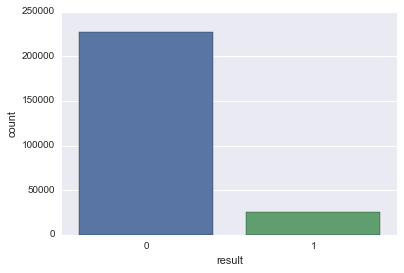

In [261]:
sns.countplot(x="result", data=df3)

In [264]:
df3["d3"].value_counts()

0     215318
1      25408
2       7114
3       2594
4       1271
5        661
6        352
7        218
8        144
9         78
10        64
11        52
12        29
13        22
15        19
14        13
16        10
18        10
17         9
21         8
20         6
19         3
22         3
27         3
34         3
23         2
25         2
33         2
35         1
24         1
28         1
29         1
30         1
31         1
36         1
Name: d3, dtype: int64

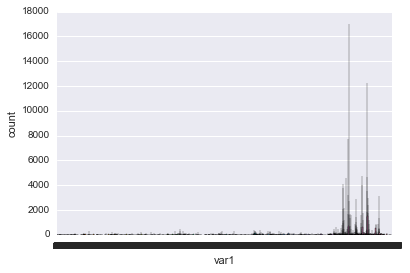

In [255]:
sns.countplot(x="var1", data=df3)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('result',axis=1), df3['result'], test_size=0.8)
GBM = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1)
GBM.fit(X_train, y_train)
preds = GBM.predict(X_test)
roc_auc_score(y_test, preds)

0.63623985164665975

In [266]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3.drop('result',axis=1), df3['result'], test_size=0.8)
GBM = RandomForestClassifier(n_estimators=500)
GBM.fit(X_train, y_train)
preds = GBM.predict(X_test)
roc_auc_score(y_test, preds)


0.65535362113955642

(126712,)